# Machine Learning Lab 2

## Assignment 2 (Deadline : 22/01/2023 11:59PM)

Total Points : 25

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab1_TLP23.ipynb

# Q1.

We want to design a system that can help a visually impaired person
know what is around them. At present, they use a “white cane” that
is used to tap and feel is there is an obstacle. We want to use machine learning to make life slightly better for them. However, given the
limitation of time we will consider a subset, though a core part of the
problem.

The posture we will adopt is that the mobile phone camera can acquire
images at some periodic intervals or when the individual wants to know
what is in the field of view of where the camera is being pointed. Assume that there are only 10 objects that are there in the world (there
is no class which is “everything else”) and the field of view may contain
one of those 10 objects.

The image is fed into a network that you have to design that can
recognize what the object is. Hopefully, a speech synthesizer can then
announce it to the individual but we will not concern ourselves with
the speech synthesis part.

Use the CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.html. This dataset has 10 objects and each image has an object. In
a real system we will have to contend with segmentation problem but
let us assume that step has been done for us.

Design a FCNN using
 
*   a single layer **(7 points)**

*   multiple layers in lower dimension, and **(7 points)**

*   a deep FCNN **(7 points)**


that can recognize the object (the category can be fed into a speech synthesizer
that can announce the object in the filed of view but that is not part of
the scope). Report the 5-fold cross validation accuracy for the third deep FCNN  and comment
on some practical difficulties that you may face in implementing this on a
mobile phone **(4 points)**

#File Download

In [1]:
!gdown 1sHMNcqc39ZklZdljTWtNMz6hPQBJ9fF5  #train file - 1
!gdown 1gbSFL2P2LXJ9cHQFU1vA_UzzDNNCt0WJ  #train file - 2
!gdown 1yJNaWSRklbYliI9RVkth4Jib5nhQB_TR  #train file - 3
!gdown 1WQolEWXeoMhgwBk8eXBpl-cb_cRD-p2Q  #train file - 4
!gdown 1c4YCTY3I1aeHPNKEJmZ1pJP0LG98wFis  #train file - 5
!gdown 1OvCVyOJKUwy0-yOLO0t4hN1Omzecuuzb #test file

Downloading...
From: https://drive.google.com/uc?id=1sHMNcqc39ZklZdljTWtNMz6hPQBJ9fF5
To: /content/data_batch_1
100% 31.0M/31.0M [00:00<00:00, 48.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gbSFL2P2LXJ9cHQFU1vA_UzzDNNCt0WJ
To: /content/data_batch_2
100% 31.0M/31.0M [00:00<00:00, 36.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yJNaWSRklbYliI9RVkth4Jib5nhQB_TR
To: /content/data_batch_3
100% 31.0M/31.0M [00:00<00:00, 32.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WQolEWXeoMhgwBk8eXBpl-cb_cRD-p2Q
To: /content/data_batch_4
100% 31.0M/31.0M [00:01<00:00, 21.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1c4YCTY3I1aeHPNKEJmZ1pJP0LG98wFis
To: /content/data_batch_5
100% 31.0M/31.0M [00:00<00:00, 58.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OvCVyOJKUwy0-yOLO0t4hN1Omzecuuzb
To: /content/test_batch
100% 31.0M/31.0M [00:00<00:00, 47.9MB/s]


#Libraries

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_val_score

#Data Handling

In [3]:
def unpickle(file):
  
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
  

In [4]:
file1 = unpickle('/content/data_batch_1')
file2 = unpickle('/content/data_batch_2')
file3 = unpickle('/content/data_batch_3')
file4 = unpickle('/content/data_batch_4')
file5 = unpickle('/content/data_batch_5')

In [5]:
test_file = unpickle('/content/test_batch')

Function for extracting data

In [6]:
def extract_data(file):
  for i,j in enumerate(file.items()):
    if j[0]==b'labels':
      y = np.array(j[1])
    if j[0]==b'data':
      X = j[1]
    
  return X,y
    

Extracting all 5 files and separating data into label and features

In [7]:
X_train1,y_train1 = extract_data(file1)
X_train2,y_train2 = extract_data(file2)
X_train3,y_train3 = extract_data(file3)
X_train4,y_train4 = extract_data(file4)
X_train5,y_train5 = extract_data(file5)

#Data Preparation

In [8]:
X_train = np.concatenate((X_train1,X_train2,X_train3,X_train4,X_train5),axis=0)/255.0
y_train = np.concatenate((y_train1,y_train2,y_train3,y_train4,y_train5),axis=0)

In [9]:
X_test, y_test = extract_data(test_file)

In [10]:
X_test = X_test/255.0

In [11]:
X_train.shape

(50000, 3072)

In [12]:
X_test.shape

(10000, 3072)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train.shape

(50000, 10)

In [15]:
y_test.shape

(10000, 10)

In [16]:
num_pixels = X_train.shape[1]  
num_classes = y_train.shape[1]

#Single Layer FCNN

Input Layer: 3072 pixels (50000 images)<br>
Output Layer: 10 number of classes<br>
Activation function: softmax 


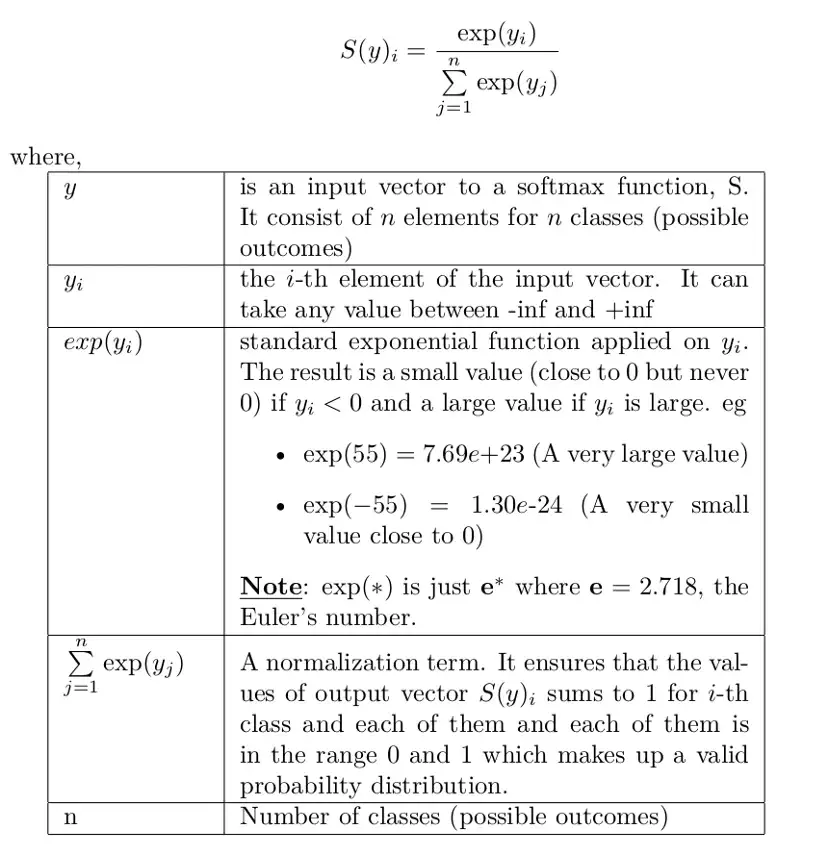
(https://towardsdatascience.com/softmax-activation-function-how-it-actually-works-d292d335bd78)


In [17]:
tf.random.set_seed(42)

In [18]:
#Create model

model_sl = Sequential()
model_sl.add(Dense(num_classes, input_dim = num_pixels, activation = 'softmax'))

In [19]:
model_sl.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [20]:
h_sl = model_sl.fit(X_train, y_train, epochs = 30, batch_size = 50, shuffle = True)

Epoch 1/30
1000/1000 [==============================] - 4s 2ms/step - loss: 1.9560 - accuracy: 0.3030
Epoch 2/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8398 - accuracy: 0.3551
Epoch 3/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8106 - accuracy: 0.3656
Epoch 4/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7922 - accuracy: 0.3743
Epoch 5/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7772 - accuracy: 0.3814
Epoch 6/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7665 - accuracy: 0.3862
Epoch 7/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7599 - accuracy: 0.3885
Epoch 8/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7517 - accuracy: 0.3922
Epoch 9/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7446 - accuracy: 0.3954
Epoch 10/30
1000/1000 [==============================] - 2s 2ms/step - loss: 1.739

In [21]:
scores_sl = model_sl.evaluate(X_test, y_test)

print("Baseline Error: {:.2f}%".format(100-scores_sl[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.7272 - accuracy: 0.4052
Baseline Error: 59.48%


In [22]:
model_sl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


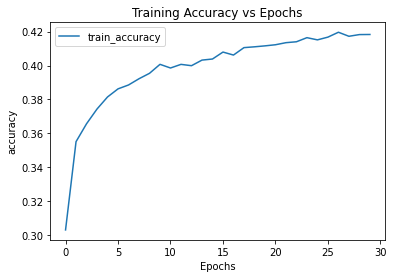

In [23]:
plt.plot(h_sl.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy'])
plt.title('Training Accuracy vs Epochs')
plt.show()

#Multi-layer FCNN
with lower dimensions

Rectified Linear Unit:<br>
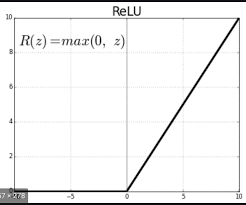

Input layer: 3072 pixels (50000 images)<br>
Activation function: relu<br>
Hidden layer 1: 100 neurons<br>
Activation function: relu<br>
Hidden layer 2: 50 neurons<br>
Activation function: relu<br>
Hidden layer 3: 25 neurons<br>
Activation function: relu<br>
Hidden layer 4: 20 neurons<br>
Activation function: relu<br>
Hidden layer 5: 15 neurons<br>
Activation function: relu<br>
Output layer: 10 classes <br>
Activation function: softmax


In [24]:
tf.random.set_seed(42)
#Create model

model_ml = Sequential()
model_ml.add(Dense(100, input_dim = num_pixels, activation='relu')) #Hidden Layer 1
model_ml.add(Dense(50, activation = 'relu'))  #Hidden Layer 2
model_ml.add(Dense(25, activation = 'relu'))  #Hidden Layer 3
model_ml.add(Dense(20, activation = 'relu'))  #Hidden Layer 4
model_ml.add(Dense(15, activation = 'relu'))  #Hidden Layer 5
model_ml.add(Dense(num_classes, activation = 'softmax'))

In [25]:
model_ml.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [26]:
h_ml = model_ml.fit(X_train, y_train, epochs = 50, batch_size = 50, shuffle = True)

Epoch 1/50
1000/1000 [==============================] - 3s 2ms/step - loss: 2.1745 - accuracy: 0.2054
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.9285 - accuracy: 0.2973
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8236 - accuracy: 0.3370
Epoch 4/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7548 - accuracy: 0.3624
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.7056 - accuracy: 0.3807
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6616 - accuracy: 0.3979
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6243 - accuracy: 0.4115
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.6008 - accuracy: 0.4241
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.5732 - accuracy: 0.4358
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 1.551

In [27]:
scores_ml = model_ml.evaluate(X_test, y_test)

print("Baseline Error: {:.2f}%".format(100-scores_ml[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 1.4006 - accuracy: 0.5101
Baseline Error: 48.99%


In [28]:
model_ml.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               307300    
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 25)                1275      
                                                                 
 dense_4 (Dense)             (None, 20)                520       
                                                                 
 dense_5 (Dense)             (None, 15)                315       
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
Total params: 314,620
Trainable params: 314,620
Non-tr

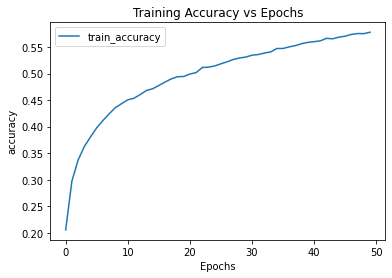

In [29]:
plt.plot(h_ml.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy'])
plt.title('Training Accuracy vs Epochs')
plt.show()

#Deep FCNN

Using 5 fold cross validation and checking the mean of validation and train accuracy. 

In [30]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

###Layers:

Input layer: 3072 pixels (50000 images)<br>
Activation function: relu<br>
Hidden layer 1: 2000 neurons<br>
Activation function: relu<br>
Hidden layer 2: 1000 neurons<br>
Activation function: relu<br>
Hidden layer 3: 500 neurons<br>
Activation function: relu<br>
Hidden layer 4: 250 neurons<br>
Activation function: relu<br>
Hidden layer 5: 100 neurons<br>
Activation function: relu<br>
Hidden layer 6: 75 neurons<br>
Activation function: relu<br>
Hidden layer 7: 50 neurons<br>
Activation function: relu<br>
Hidden layer 8: 25 neurons<br>
Activation function: relu<br>
Hidden layer 9: 20 neurons<br>
Activation function: relu<br>
Hidden layer 10: 15 neurons<br>
Activation function: relu<br>
Output layer: 10 classes <br>
Activation function: softmax


In [31]:
acc = []
loss = []
fold = 1
for train_index, val_index in kf.split(X_train,y_train):

  print("------------------------------------------------------------------")
  print("------------------------------------------------------------------")
  print(f"Fold no. {fold}")
  X_tr, X_val = X_train[train_index], X_train[val_index]
  y_tr, y_val = y_train[train_index], y_train[val_index]

  num_pixels = X_tr.shape[1]  
  num_classes = y_tr.shape[1]

  #Create model
  model_dl = Sequential()
  model_dl.add(Dense(2000, input_dim = num_pixels, activation='relu'))  #Hidden Layer 1
  model_dl.add(Dense(1000, activation = 'relu'))  #Hidden Layer 2
  model_dl.add(Dense(500, activation = 'relu'))   #Hidden Layer 3
  model_dl.add(Dense(250, activation = 'relu'))   #Hidden Layer 4
  model_dl.add(Dense(100, activation = 'relu'))   #Hidden Layer 5
  model_dl.add(Dense(75, activation = 'relu'))    #Hidden Layer 6
  model_dl.add(Dense(50, activation = 'relu'))    #Hidden Layer 7
  model_dl.add(Dense(25, activation = 'relu'))    #Hidden Layer 8
  model_dl.add(Dense(20, activation = 'relu'))    #Hidden Layer 9
  model_dl.add(Dense(15, activation = 'relu'))    #Hidden Layer 10
  model_dl.add(Dense(num_classes, activation = 'softmax'))

  model_dl.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

  h_dl = model_dl.fit(X_tr, y_tr, epochs = 50, batch_size = 50, shuffle = True)

  loss.append(model_dl.evaluate(X_val, y_val)[0])
  acc.append(model_dl.evaluate(X_val, y_val)[1])

  fold += 1

------------------------------------------------------------------
------------------------------------------------------------------
Fold no. 1
Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 2.2569 - accuracy: 0.1619
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 2.0308 - accuracy: 0.2451
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 1.8926 - accuracy: 0.2998
Epoch 4/50
800/800 [==============================] - 3s 3ms/step - loss: 1.8134 - accuracy: 0.3325
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 1.7418 - accuracy: 0.3619
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 1.6757 - accuracy: 0.3927
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 1.6200 - accuracy: 0.4134
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: 1.5694 - accuracy: 0.4351
Epoch 9/50
800/800 [==============================] - 3

In [32]:
print(f"Average validation accuracy : {np.mean(acc)*100}%")

Average validation accuracy : 52.08999991416932%


In [33]:
loss

[2.0567595958709717,
 2.1243457794189453,
 2.2021682262420654,
 2.256650447845459,
 2.2607991695404053]

In [34]:
print(f"The test accuracy is {model_dl.evaluate(X_test, y_test)[1]*100} %")

313/313 [==============================] - 1s 3ms/step - loss: 2.1851 - accuracy: 0.5283
The test accuracy is 52.82999873161316 %


In [35]:
model_dl.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 2000)              6146000   
                                                                 
 dense_52 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_53 (Dense)            (None, 500)               500500    
                                                                 
 dense_54 (Dense)            (None, 250)               125250    
                                                                 
 dense_55 (Dense)            (None, 100)               25100     
                                                                 
 dense_56 (Dense)            (None, 75)                7575      
                                                                 
 dense_57 (Dense)            (None, 50)               

#Question: <br>
Comment on some practical difficulties that you may face in implementing this on a mobile phone.

#Answer: <br>



*   Deep fully connected neural networks (FCNNs) demand a large amount of memory and processing capacity and are computationally demanding. The complexity of a deep FCNN will not work on a mobile phones.

*   Deep FCNNs are also frequently employed for tasks like image or video identification that may not be a mobile phone's main emphasis. Therefore, using a deep FCNN on a mobile device might not be practicable.

*   The number of parameters in the deep FCNN are 8.8 million trainable parameters. Hence, mobile phone doesn't have enough computing power as well as memory space.